In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [78]:
X = np.genfromtxt('../datasets/Selective_descriptors_X')
Y = np.genfromtxt('../datasets/Selective_descriptors_Y')
X_train,X_test = train_test_split(X,test_size=0.05,random_state=1010)
Y_train,Y_test = train_test_split(Y,test_size=0.05,random_state=1010)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)


(2396, 21) (127, 21)
(2396,) (127,)


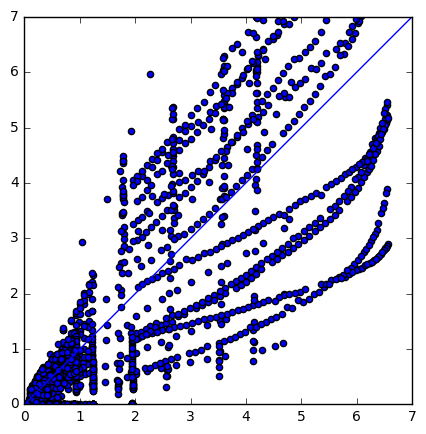

In [83]:
regr = MLP(solver='adam',activation='tanh',max_iter=500000,learning_rate_init=0.00001,hidden_layer_sizes=(200,))
regr.fit(X_train,Y_train)
plt.figure(figsize = (5,5) )
plt.scatter(regr.predict(X_train),Y_train)
plt.plot(np.linspace(0,7),np.linspace(0,7))
plt.xlim((0,7))
plt.ylim((0,7))
plt.show()

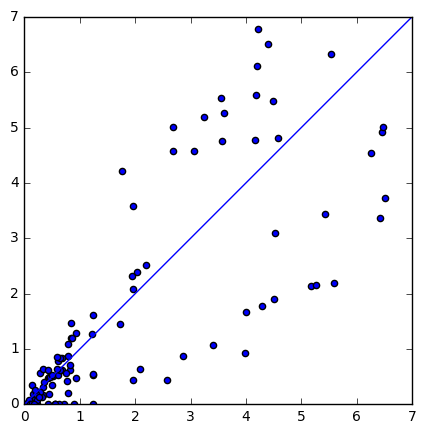

In [85]:
plt.figure(figsize = (5,5) )
plt.scatter(regr.predict(X_test),Y_test)
plt.plot(np.linspace(0,7),np.linspace(0,7))
plt.xlim((0,7))
plt.ylim((0,7))
plt.show()

In [89]:
result = pd.DataFrame(columns=['Experiment','Prediction'])
result.Experiment=Y_train
result.Prediction=regr.predict(X_train)


   Experiment  Prediction
0      6.2600    4.964325
1      0.1054    0.189054
2      3.4500    1.787590
3      0.4150    0.209939
4      0.6060    0.474374
